In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from skimage.measure import label, regionprops

/Users/kuanlin/opt/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
img1 = plt.imread("./Sample_Data/Txn_series1_0min_sender.tif")
img2 = plt.imread("./Sample_Data/Txn_series1_0min_receiver.tif")

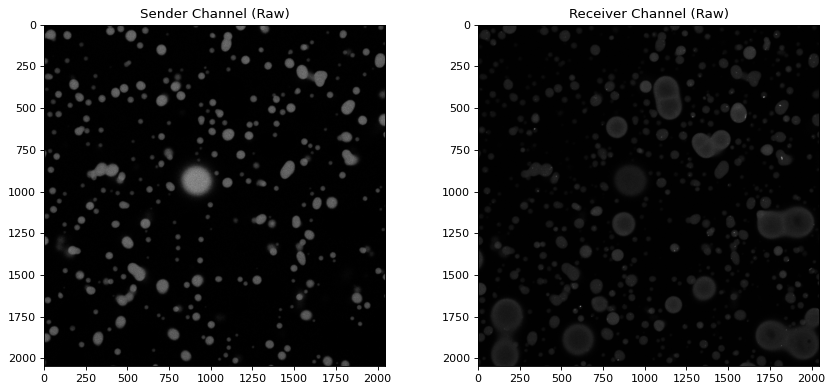

In [3]:
fig = plt.figure(figsize=(11, 5), dpi = 80)

plt.subplot(1, 2, 1)
plt.title("Sender Channel (Raw)")
plt.imshow(img1, cmap="gray")

plt.subplot(1, 2, 2)
plt.title("Receiver Channel (Raw)")
plt.imshow(img2, cmap="gray")

plt.tight_layout()
plt.show()

## Droplet Identification

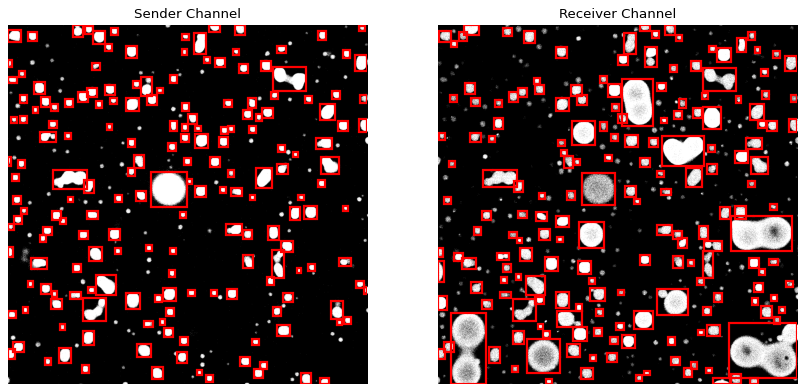

In [4]:
figure = plt.figure(figsize=(11, 5), dpi = 80)

# Create Binary for better signal to noise
binary = img1 > (img1.mean() + img1.std())

# use labeling function to identify connected blobs
label_im = label(binary)
blob_lists = regionprops(label_im)

# Remove small blobs
senders = [i for i in blob_lists if i.area > 500]

ax = plt.subplot(1, 2, 1)

plt.imshow(binary, cmap = "gray")
plt.title("Sender Channel")
for i in senders:
    minr, minc, maxr, maxc = i.bbox
    rect = plt.Rectangle((minc, minr), maxc - minc, maxr - minr,
                              fill=False, edgecolor='red', linewidth=2)
    ax.add_patch(rect)
    ax.set_axis_off()

# Create Binary for better signal to noise
binary = img2 > (img2.mean() + img2.std())

# use labeling function to identify connected blobs
label_im = label(binary)
blob_lists = regionprops(label_im)

# Remove small blobs
receivers = [i for i in blob_lists if i.area > 500]

ax = plt.subplot(1, 2, 2)

plt.imshow(binary, cmap = "gray")
plt.title("Receiver Channel")
for i in receivers:
    minr, minc, maxr, maxc = i.bbox
    rect = plt.Rectangle((minc, minr), maxc - minc, maxr - minr,
                              fill=False, edgecolor='red', linewidth=2)
    ax.add_patch(rect)
    ax.set_axis_off()
    
plt.tight_layout()
plt.show()

### Create a mask to identify sender locations

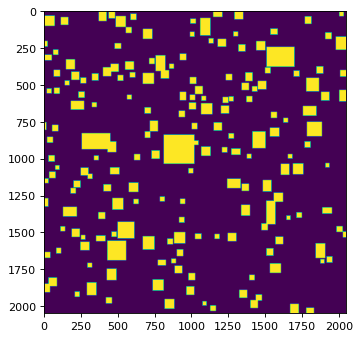

In [6]:
figure = plt.figure(figsize=(5, 5), dpi = 80)

mask = np.zeros_like(binary)

for blob in senders:
    minr, minc, maxr, maxc = blob.bbox
    mask[minr:maxr, minc:maxc]=1
    
plt.imshow(mask)
plt.show()

### Distinguish Sender droplets and Receiver Droplets

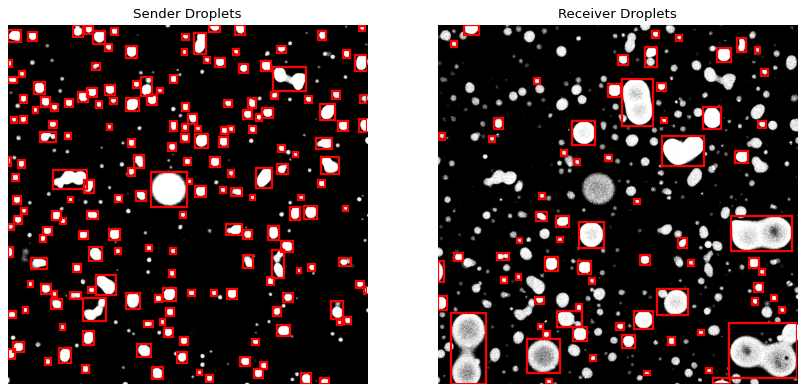

In [8]:
figure = plt.figure(figsize=(11, 5), dpi = 80)

# Create Binary for better signal to noise
binary = img1 > (img1.mean() + img1.std())

# use labeling function to identify connected blobs
label_im = label(binary)
blob_lists = regionprops(label_im)

# Remove small blobs
senders = [i for i in blob_lists if i.area > 500]

# Mask to document all sender locations
mask = np.zeros_like(binary)

ax = plt.subplot(1, 2, 1)

plt.imshow(binary, cmap = "gray")
plt.title("Sender Droplets")
for i in senders:
    minr, minc, maxr, maxc = i.bbox
    mask[minr:maxr, minc:maxc] = 1
    rect = plt.Rectangle((minc, minr), maxc - minc, maxr - minr,
                              fill=False, edgecolor='red', linewidth=2)
    ax.add_patch(rect)
    ax.set_axis_off()
    
# Create Binary for better signal to noise
binary = img2 > (img2.mean() + img2.std())


# use labeling function to identify connected blobs
label_im = label(binary)
blob_lists = regionprops(label_im)

# Remove small blobs
receivers = [i for i in blob_lists if i.area > 500]

true_receivers = []

ax = plt.subplot(1, 2, 2)

plt.imshow(binary, cmap = "gray")
plt.title("Receiver Droplets")
for i in receivers:
    minr, minc, maxr, maxc = i.bbox
    if mask[int((minr+maxr)/2), int((minc+maxc)/2)] == 0:
        true_receivers.append(i)
        rect = plt.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                  fill=False, edgecolor='red', linewidth=2)
        ax.add_patch(rect)
        ax.set_axis_off()
    
plt.tight_layout()
plt.show()

### Extract the Intensity Values of Sender and Receiver Droplets

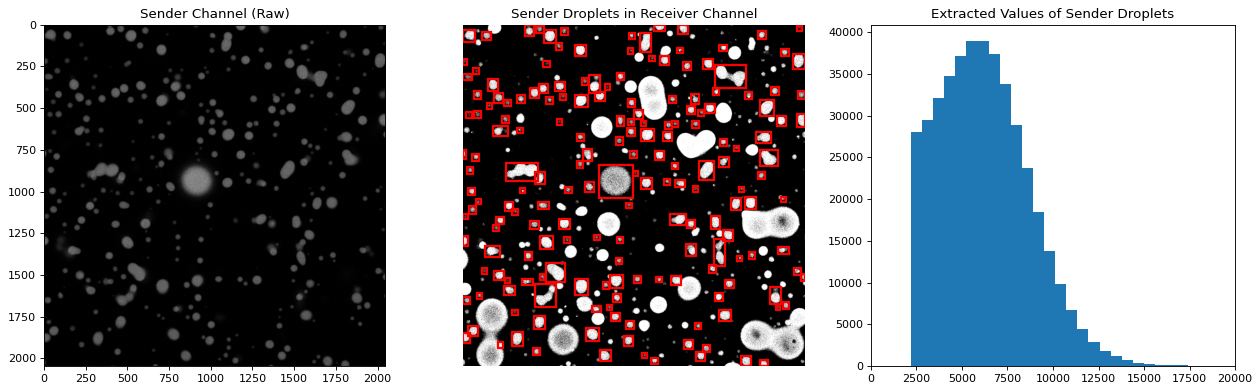

In [24]:
values = []
for blob in senders:
    minr, minc, maxr, maxc = blob.bbox
    blob_img = img2[minr:maxr, minc:maxc]
    vals = blob_img.flatten()
    background = np.quantile(img2.flatten(), .75)
    vals = vals[vals > background]
    values.append(vals)
values = np.concatenate(values)

figure = plt.figure(figsize=(16, 5), dpi = 80)

plt.subplot(1, 3, 1)
plt.imshow(img1, cmap = "gray")
plt.title("Sender Channel (Raw)")

ax = plt.subplot(1, 3, 2)

plt.imshow(img2 > (img2.mean() + img2.std()), cmap = "gray")
plt.title("Sender Droplets in Receiver Channel")

for i in senders:
    minr, minc, maxr, maxc = i.bbox
    rect = plt.Rectangle((minc, minr), maxc - minc, maxr - minr,
                              fill=False, edgecolor='red', linewidth=2)
    ax.add_patch(rect)
    ax.set_axis_off()

plt.subplot(1, 3, 3)
plt.title("Extracted Values of Sender Droplets")
plt.hist(values, bins = 100)
plt.xlim(0, 20000)

plt.tight_layout()
plt.show()

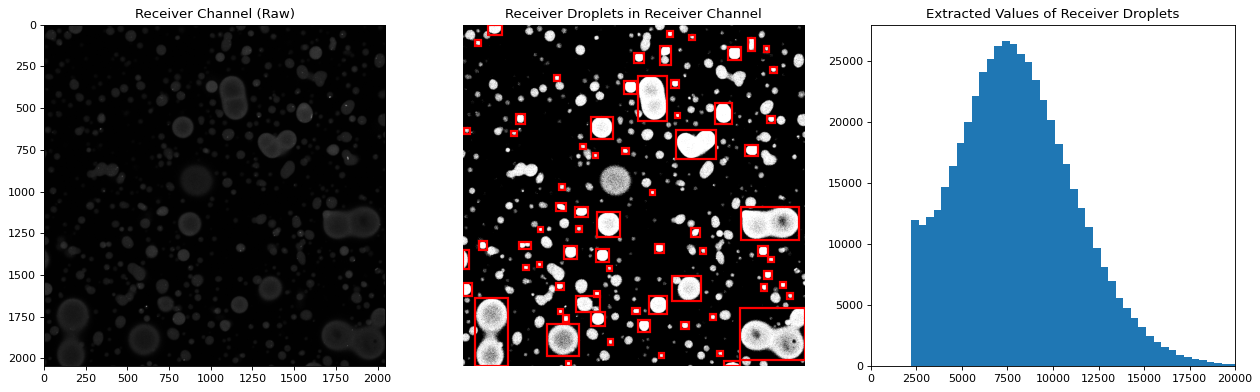

In [26]:
values = []
for blob in true_receivers:
    minr, minc, maxr, maxc = blob.bbox
    blob_img = img2[minr:maxr, minc:maxc]
    vals = blob_img.flatten()
    background = np.quantile(img2.flatten(), .75)
    vals = vals[vals > background]
    values.append(vals)
values = np.concatenate(values)

figure = plt.figure(figsize=(16, 5), dpi = 80)

plt.subplot(1, 3, 1)
plt.imshow(img2, cmap = "gray")
plt.title("Receiver Channel (Raw)")

ax = plt.subplot(1, 3, 2)

plt.imshow(img2 > (img2.mean() + img2.std()), cmap = "gray")
plt.title("Receiver Droplets in Receiver Channel")

for i in true_receivers:
    minr, minc, maxr, maxc = i.bbox
    rect = plt.Rectangle((minc, minr), maxc - minc, maxr - minr,
                              fill=False, edgecolor='red', linewidth=2)
    ax.add_patch(rect)
    ax.set_axis_off()

plt.subplot(1, 3, 3)
plt.title("Extracted Values of Receiver Droplets")
plt.hist(values, bins = 100)
plt.xlim(0, 20000)

plt.tight_layout()
plt.show()

# Appendix

#### Experimenting with the blob detection algorithms in `skimage.feature`

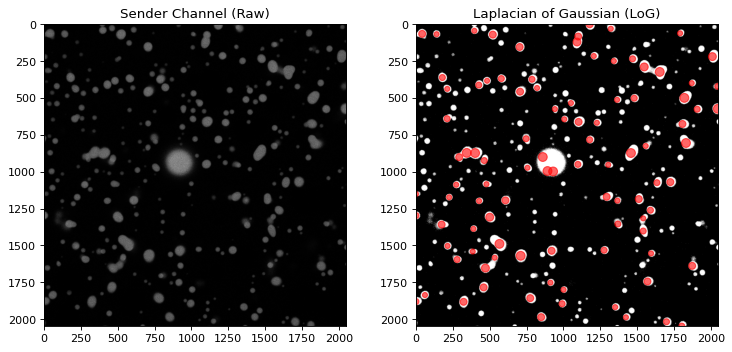

In [4]:
from skimage.feature import blob_dog, blob_log, blob_doh

img1 = plt.imread("./Sample_Data/Txn_series1_0min_sender.tif")

# Create Binary for better signal to noise
binary = img1 > (img1.mean() + img1.std())

# Blob Detection
blobs_log = blob_log(binary, max_sigma=30, num_sigma=10, threshold=.1)

# Remove tiny blobs
bead_list = np.array([i for i in blobs_log if i[2]> np.median(np.unique(blobs_log[:, 2]))])

fig = plt.figure(figsize=(11, 5), dpi = 80)

plt.subplot(1, 2, 1)
plt.title("Sender Channel (Raw)")
plt.imshow(img1, cmap="gray")

ax = plt.subplot(1, 2, 2)
plt.title("Laplacian of Gaussian (LoG)")
plt.imshow(binary, cmap = "gray")

circles, ctr = [], 0
for bead in bead_list:
    circles.append(plt.Circle((bead[1], bead[0]), bead[2], color="red",\
                              alpha= .6, label = "bead {:.0f}".format(ctr)) )
    ctr+=1

for circle in circles:
    ax.add_patch(circle)
    
plt.show()

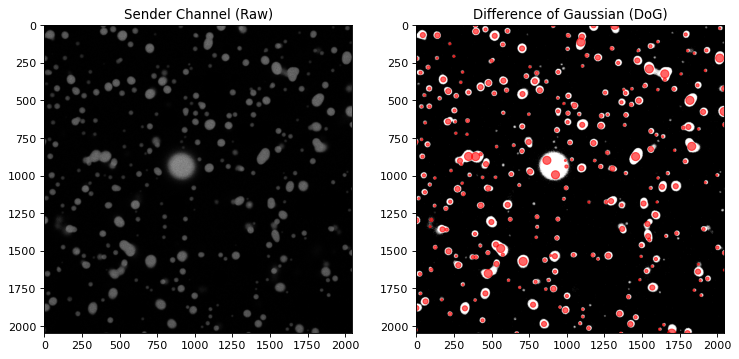

In [37]:
from skimage.feature import blob_dog, blob_log, blob_doh

img1 = plt.imread("./Sample_Data/Txn_series1_0min_sender.tif")

# Create Binary for better signal to noise
binary = img1 > (img1.mean() + img1.std())

# Blob Detection
blobs_log = blob_dog(binary, max_sigma=30, threshold=.1)

# Remove tiny blobs
bead_list = np.array([i for i in blobs_log if i[2]> np.median(np.unique(blobs_log[:, 2]))])

fig = plt.figure(figsize=(11, 5), dpi = 80)

plt.subplot(1, 2, 1)
plt.title("Sender Channel (Raw)")
plt.imshow(img1, cmap="gray")

ax = plt.subplot(1, 2, 2)
plt.title("Difference of Gaussian (DoG)")
plt.imshow(binary, cmap = "gray")

circles, ctr = [], 0
for bead in bead_list:
    circles.append(plt.Circle((bead[1], bead[0]), bead[2], color="red",\
                              alpha= .6, label = "bead {:.0f}".format(ctr)) )
    ctr+=1

for circle in circles:
    ax.add_patch(circle)
    
plt.show()

In [39]:
# from skimage.feature import blob_dog, blob_log, blob_doh

# img1 = plt.imread("./Sample_Data/Txn_series1_0min_sender.tif")

# # Create Binary for better signal to noise
# binary = img1 > (img1.mean() + img1.std())

# # Blob Detection
# blobs_log = blob_doh(binary, max_sigma=30, threshold=.01)

# # Remove tiny blobs
# bead_list = np.array([i for i in blobs_log if i[2]> np.median(np.unique(blobs_log[:, 2]))])

# fig = plt.figure(figsize=(11, 5), dpi = 80)

# plt.subplot(1, 2, 1)
# plt.title("Sender Channel (Raw)")
# plt.imshow(img1, cmap="gray")

# ax = plt.subplot(1, 2, 2)
# plt.title("Determinant of Hessian (DoH)")
# plt.imshow(binary, cmap = "gray")

# circles, ctr = [], 0
# for bead in bead_list:
#     circles.append(plt.Circle((bead[1], bead[0]), bead[2], color="red",\
#                               alpha= .6, label = "bead {:.0f}".format(ctr)) )
#     ctr+=1

# for circle in circles:
#     ax.add_patch(circle)
    
# plt.show()

#### However, the droplets are typically non-sperical and the size distribution is too large so the blob detection works poorly.

- Warning: Determinant of Hessian (DoH) is much more computationally expensive than the other two and takes longer time.

In [5]:
figure = plt.figure(figsize=(11, 5), dpi = 80)

# Create Binary for better signal to noise
binary = img1 > (img1.mean() + img1.std())

# use labeling function to identify connected blobs
label_im = label(binary)
blob_lists = regionprops(label_im)

# # Remove small blobs
# senders = [i for i in blob_lists if i.area > 500]

# ax = plt.subplot(1, 2, 1)

# plt.imshow(binary, cmap = "gray")
# plt.title("Sender Channel")
# for i in senders:
#     minr, minc, maxr, maxc = i.bbox
#     rect = plt.Rectangle((minc, minr), maxc - minc, maxr - minr,
#                               fill=False, edgecolor='red', linewidth=2)
#     ax.add_patch(rect)
#     ax.set_axis_off()

# # Create Binary for better signal to noise
# binary = img2 > (img2.mean() + img2.std())

# # use labeling function to identify connected blobs
# label_im = label(binary)
# blob_lists = regionprops(label_im)

# # Remove small blobs
# receivers = [i for i in blob_lists if i.area > 500]

# ax = plt.subplot(1, 2, 2)

# plt.imshow(binary, cmap = "gray")
# plt.title("Receiver Channel")
# for i in receivers:
#     minr, minc, maxr, maxc = i.bbox
#     rect = plt.Rectangle((minc, minr), maxc - minc, maxr - minr,
#                               fill=False, edgecolor='red', linewidth=2)
#     ax.add_patch(rect)
#     ax.set_axis_off()
    
# plt.tight_layout()
# plt.show()

<Figure size 880x400 with 0 Axes>

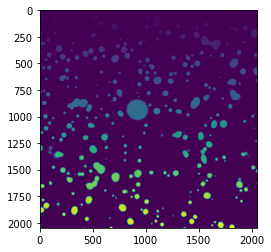

In [6]:
plt.imshow(label_im)

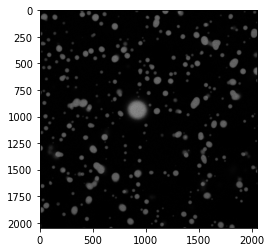

In [10]:
plt.imshow(img1, cmap = "gray")

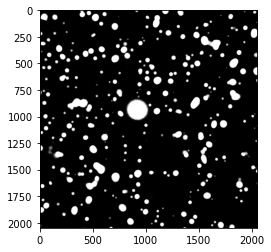

In [9]:
plt.imshow(binary, cmap = "gray")